**1. Решите линейную систему: $\begin{bmatrix} 1 \ 2 \ 3 \\ 4 \ 0 \ 6 \\ 7 \ 8 \ 9 \\ \end{bmatrix} \cdot X = \begin{bmatrix} 12 \\ 2 \\ 1 \\ \end{bmatrix}$**

In [86]:
import numpy as np

In [87]:
a = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])

b = np.array([[12], [2], [1]])

In [88]:
a_inv = np.linalg.inv(a)

In [89]:
X = np.dot(a_inv, b)

X

array([[-9.2       ],
       [ 0.9       ],
       [ 6.46666667]])

**2. Найдите псевдорешение:**

x + 2y – z = 1;

3x – 4y = 7;

8x – 5y + 2z = 12;

2x – 5z = 7;

11x +4y – 7z = 15.

**Представим систему линейных уравнений в матричном виде:**

$\begin{pmatrix} 1 \ 2 \ -1 \\ 3 \ -4 \ 0 \\ 8 \ -5 \ 2 \\ 2 \ 0 \ -5 \\ 11 \ 4 \ -7 \\ \end{pmatrix} \cdot \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} 1 \\ 7 \\ 12 \\ 7 \\ 15 \\ \end{pmatrix}$

In [90]:
a = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])

b = np.array([[1], [7], [12], [7], [15]])

In [91]:
np.linalg.lstsq(a, b, rcond=None)

(array([[ 1.13919353],
        [-0.90498444],
        [-0.9009803 ]]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

**3. Сколько решений имеет линейная система: $\begin{bmatrix} 1 \ 2 \ 3 \\ 4 \ 5 \ 6 \\ 7 \ 8 \ 9 \\ \end{bmatrix} \cdot X = \begin{bmatrix} 12 \\ 2 \\ 1 \\ \end{bmatrix}$**

**Если ноль, то измените вектор правой части так, чтобы система стала совместной, и решите ее.**

In [92]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

b = np.array([[12], [2], [1]])

In [93]:
c = np.concatenate((a, b), axis=1)

print(c,'\n')

print(f'Матрица A имеет ранг- {np.linalg.matrix_rank(a, 0.0001)}.\n')

print(f'Матрица B имеет ранг- {np.linalg.matrix_rank(c, 0.0001)}.')

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]] 

Матрица A имеет ранг- 2.

Матрица B имеет ранг- 3.


**Изменим правую часть для уравнивания рангов.**

In [94]:
b = np.array([[1], [2], [3]])

In [95]:
c = np.concatenate((a, b), axis=1)

print(c,'\n')

print(f'Матрица A имеет ранг- {np.linalg.matrix_rank(a, 0.0001)}.\n')

print(f'Матрица B имеет ранг- {np.linalg.matrix_rank(c, 0.0001)}.')

[[1 2 3 1]
 [4 5 6 2]
 [7 8 9 3]] 

Матрица A имеет ранг- 2.

Матрица B имеет ранг- 2.


**Был подобран вектор решения, при котором ранги матриц совпадают, но при этом ранг меньше количества неизвестных, следовательно СЛУ имеет бесконечное количество решений.**

**4. Вычислите LU-разложение матрицы: $\begin{bmatrix} 1 \ 2 \ 3 \\ 2 \ 16 \ 21 \\ 4 \ 28 \ 73 \\ \end{bmatrix}$.**
**После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.**

In [96]:
import scipy
import scipy.linalg

In [97]:
a = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])

p, l, u = scipy.linalg.lu(a)

In [98]:
print(p, '\n')

print(l, '\n')

print(u)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]] 

[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [99]:
np.linalg.det(a)

432.00000000000017

In [100]:
b = np.array([[15, 40, 18]])

In [101]:
np.linalg.solve(a, b.T)

array([[14.14814815],
       [ 2.87037037],
       [-1.62962963]])

**5. Найдите нормальное псевдорешение недоопределенной системы:**

x + 2y – z = 1;

8x – 5y + 2z = 12.

**Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.** 

In [102]:
import matplotlib.pyplot as plt

import pylab

from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'x')

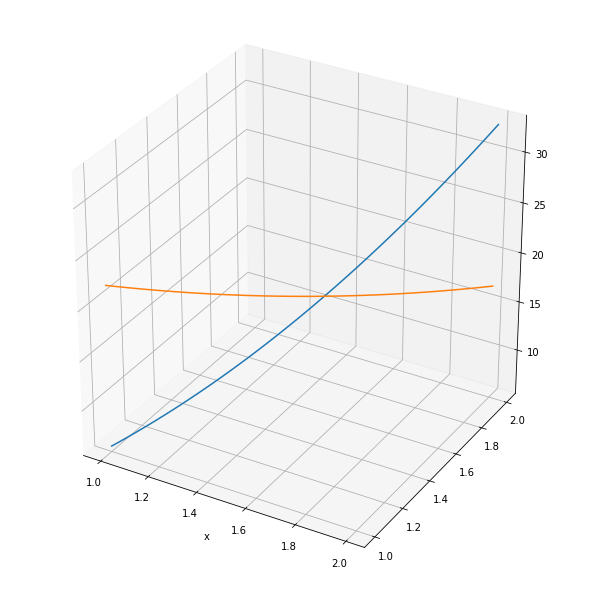

In [103]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

fig = plt.figure(figsize=(8, 8))

ax = Axes3D(fig)

X = np.linspace(1, 2, 100)

Y = np.linspace(1, 2, 100)

plt.plot(X, Y, Q(X, Y, (X + 2*Y - 1)))

plt.plot(X, Y, Q(X, Y, (6 + 2.5*Y - 4*X)))

plt.xlabel('x')

**Из построения видно, что x приблизительно равен 1.27.**

**Найдем решения при помощи программных инструментариев.**

In [104]:
a = np.array([[1, 2, -1], [8, -5, 2]])

b = np.array([[1], [12]])

np.linalg.lstsq(a, b, rcond=None)

(array([[ 1.38191882],
        [-0.18081181],
        [ 0.0202952 ]]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

**6. Найдите одно из псевдорешений вырожденной системы: $\begin{bmatrix} 1 \ 2 \ 3 \\ 4 \ 5 \ 6 \\ 7 \ 8 \ 9 \\ \end{bmatrix} \cdot X = \begin{bmatrix} 2 \\ 5 \\ 11 \\ \end{bmatrix}$**

**Попробуйте также отыскать и нормальное псевдорешение.**

In [105]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

b = np.array([[2], [5], [11]])

q, r = np.linalg.qr(a)

print(a, '\n')

print(q, '\n')

print(r)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]] 

[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -7.58790979e-16]]


In [106]:
r1 = r[:2, :2]

r1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [107]:
b1 = np.dot(np.transpose(q), b)[:2]

b1

array([[-1.21860576e+01],
       [ 3.33066907e-15]])

In [108]:
x1 = np.linalg.solve(r1, b1)

x1

array([[1.50000000e+00],
       [3.68219321e-15]])

In [109]:
x = np.append(x1, 0)

print (x, '\n')

np.linalg.norm(x)

[1.50000000e+00 3.68219321e-15 0.00000000e+00] 



1.499999999999996

**Нормальное значение.**

In [110]:
np.linalg.norm(np.dot(a, x) - b)

15.732132722552272

In [111]:
x = np.linalg.lstsq(a, b, rcond=-1)[0]

x

array([[ 1.25],
       [ 0.5 ],
       [-0.25]])

In [112]:
np.linalg.norm(x), np.linalg.norm(np.dot(a, x) - b)

(1.3693063937629146, 1.2247448713915887)